In [ ]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Подключаем гугл-диск
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isna().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    
    return summary

In [ ]:
yur_nachisleniya_prom_ee_df = pd.read_csv('/content/drive/MyDrive/DS ninjas/ch.xackaton_fuv2_yur_nachisleniya_prom_ee.csv') # Создаем df по таблице №7

In [ ]:
yur_nachisleniya_prom_ee_df.head()

,month_year,id,price_category,useful_vacation_kVt,useful_vacation_with_nds_rub,charged_by_acts_ex_usage_with_nds_rub,product_type,power_range,calc_and_charging_algorithm,prom_charging_type
0,2021.04,30000375,Первая ценовая категория,27,108.27,0.0,Электроэнергия,Менее 150 кВт,По среднему,полезный отпуск
1,2021.04,30000375,Первая ценовая категория,1870,12509.39,0.0,Электроэнергия,Менее 150 кВт,по показаниям,полезный отпуск
2,2021.04,30000375,Первая ценовая категория,36948,227936.94,0.0,Электроэнергия,От 150 до 670 кВт,по показаниям,полезный отпуск
3,2021.04,30000531,Первая ценовая категория,2839,17514.16,0.0,Электроэнергия,Менее 150 кВт,по показаниям,полезный отпуск
4,2021.04,30000807,Первая ценовая категория,686711,4846215.00,0.0,Электроэнергия,Менее 150 кВт,по показаниям,полезный отпуск


In [ ]:
resumetable(yur_nachisleniya_prom_ee_df)

Dataset Shape: (4131588, 10)


,Name,dtypes,Missing,Uniques,First Value
0,month_year,float64,0,25,2021.04
1,id,int64,0,160979,30000375
2,price_category,object,0,7,Первая ценовая категория
3,useful_vacation_kVt,int64,0,233066,27
4,useful_vacation_with_nds_rub,float64,0,1852468,108.27
5,charged_by_acts_ex_usage_with_nds_rub,float64,0,693,0
6,product_type,object,0,2,Электроэнергия
7,power_range,object,111,5,Менее 150 кВт
8,calc_and_charging_algorithm,object,0,8,По среднему
9,prom_charging_type,object,0,10,полезный отпуск


In [ ]:
# Заменим все NaN-ы на 0
yur_nachisleniya_prom_ee_df = yur_nachisleniya_prom_ee_df.fillna(0)

In [ ]:
# Проверим, что NaN-ы исчезли
resumetable(yur_nachisleniya_prom_ee_df)

Dataset Shape: (4131588, 10)


,Name,dtypes,Missing,Uniques,First Value
0,month_year,float64,0,25,2021.04
1,id,int64,0,160979,30000375
2,price_category,object,0,7,Первая ценовая категория
3,useful_vacation_kVt,int64,0,233066,27
4,useful_vacation_with_nds_rub,float64,0,1852468,108.27
5,charged_by_acts_ex_usage_with_nds_rub,float64,0,693,0
6,product_type,object,0,2,Электроэнергия
7,power_range,object,0,6,Менее 150 кВт
8,calc_and_charging_algorithm,object,0,8,По среднему
9,prom_charging_type,object,0,10,полезный отпуск


In [ ]:
# Выведем таблицу корреляции
corr_1 = yur_nachisleniya_prom_ee_df.corr()
corr_1.head()

,month_year,id,useful_vacation_kVt,useful_vacation_with_nds_rub,charged_by_acts_ex_usage_with_nds_rub
month_year,1.000000,0.001897,-0.001026,0.000266,-0.001024
id,0.001897,1.000000,-0.015899,-0.020990,0.000408
useful_vacation_kVt,-0.001026,-0.015899,1.000000,0.792755,0.006209
useful_vacation_with_nds_rub,0.000266,-0.020990,0.792755,1.000000,0.007503
charged_by_acts_ex_usage_with_nds_rub,-0.001024,0.000408,0.006209,0.007503,1.000000


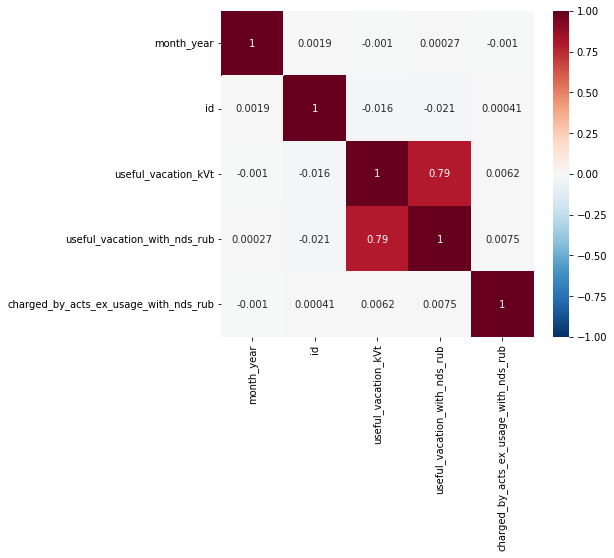

In [ ]:
# Визуализируем таблицу корреляции
plt.figure(figsize=(7,6))
sns.heatmap(corr_1, cmap=sns.color_palette("RdBu_r", 1000), vmin=-1, center=0, annot=True) 
plt.show()

In [ ]:
# Проведем количественный анализ по признаку prom_charging_type
yur_nachisleniya_prom_ee_df['prom_charging_type'].value_counts()

полезный отпуск                   3979833
мощность                           145700
корр-ка полезного отпуска            4597
добор/возврат по мощности             741
плата за э/э по юр. акту              372
корр-ка по юр. акту                   291
кор. мощн. по акту неуч. потр.         27
добор/возврат мощности 1               17
мощность по акту о неуч. потр.          9
добор/возврат мощности 2                1
Name: prom_charging_type, dtype: int64

In [ ]:
# Проведем количественный анализ по признаку calc_and_charging_algorithm
yur_nachisleniya_prom_ee_df['calc_and_charging_algorithm'].value_counts()

по показаниям                    3830650
не производится                   151751
по факту прошлого месяца          118498
По среднему                        26213
по максимальной мощности            4420
по интегральным данным                54
% от начисления пред. периода          1
По нормативу                           1
Name: calc_and_charging_algorithm, dtype: int64

In [ ]:
# Проведем количественный анализ по признаку power_range	
yur_nachisleniya_prom_ee_df['power_range'].value_counts()

Менее 150 кВт          3109582
От 150 до 670 кВт       722854
От 670 кВт до 10МВт     284317
Свыше 10МВт              13436
не определено             1288
0                          111
Name: power_range, dtype: int64

In [ ]:
# Проведем количественный анализ по признаку price_category	
yur_nachisleniya_prom_ee_df['price_category'].value_counts()

Первая ценовая категория       3503093
Вторая ценовая категория        330528
Третья ценовая категория        216693
Четвертая ценовая категория      76402
Шестая ценовая категория          4514
Пятая ценовая категория            247
Не определено                      111
Name: price_category, dtype: int64

In [ ]:
# Проведем количественный анализ по признаку id	
yur_nachisleniya_prom_ee_df['id'].value_counts()

31201842     408
105242103    370
122466246    348
34694130     317
44310276     304
            ... 
243448092      1
176651304      1
30244200       1
241167570      1
260831499      1
Name: id, Length: 160979, dtype: int64

In [ ]:
# Проведем количественный анализ по признаку month_year	
yur_nachisleniya_prom_ee_df['month_year'].value_counts()

2021.09    180735
2021.08    179372
2021.07    177753
2021.06    176048
2021.05    174352
2021.04    173197
2021.03    171561
2021.02    170014
2021.01    168529
2020.12    168039
2020.11    166136
2020.10    164889
2020.09    163586
2020.08    162651
2020.07    161689
2020.06    160964
2020.05    160294
2020.04    159873
2020.03    159628
2020.02    158570
2020.01    156997
2019.12    156245
2019.11    154655
2019.10    153438
2019.09    152373
Name: month_year, dtype: int64

In [ ]:
# Проведем количественный анализ по признаку useful_vacation_kVt		
yur_nachisleniya_prom_ee_df['useful_vacation_kVt'].value_counts()

0         437394
1          14183
100         9706
90          9080
200         7842
           ...  
146394         1
134108         1
250855         1
244714         1
125888         1
Name: useful_vacation_kVt, Length: 233066, dtype: int64

In [ ]:
# Проведем количественный анализ по признаку useful_vacation_with_nds_rub			
yur_nachisleniya_prom_ee_df['useful_vacation_with_nds_rub'].value_counts()

0.00         290823
438.30         2534
418.50         2111
876.60         1689
837.00         1294
              ...  
296796.44         1
22199.27          1
10205.37          1
448723.30         1
32335.79          1
Name: useful_vacation_with_nds_rub, Length: 1852468, dtype: int64

In [ ]:
yur_nachisleniya_oplati_dz_kz_2019_2021_df = pd.read_csv('/content/drive/MyDrive/DS ninjas/ch.xackaton_fuv2_yur_nachisleniya_oplati_dz_kz_2019_2021.csv') # Формируем df по таблице №8

In [ ]:
yur_nachisleniya_oplati_dz_kz_2019_2021_df.head()

,month_year,id,contract_kind,contract_type,msfo_group_name,useful_vacation_kVth,useful_vacation_total_rub,charge_cost_total_rub,realization_total_rub,dz_for_period_end_with_nds_rub,kz_for_period_end_with_nds_rub,total_kz_for_period_end_nds_rub
0,2020.01,30000375,одноставочный,Государственный контракт,Федеральный бюджет,69609,389254.22,214086.60,520339.66,83001.16,0,0.00
1,2020.01,30000531,одноставочный,Договор энергоснабжения,Сельское хозяйство,1907,10640.12,1405.59,12045.71,0,1843.87,1843.87
2,2020.01,30000807,двуставочный,Договор энергоснабжения с ЭСО,"Энергосбытовые компании (ЭСК, ГП 2, ОПП)",1638521,10549541,2863794.00,10916151.00,2497184.2,0,0.00
3,2020.01,30000831,одноставочный,Договор энергоснабжения,Промышленность,14293,86519.03,0.00,0.00,99565.5,\N,0.00
4,2020.01,30000891,одноставочный,Договор энергоснабжения,Прочие потребители,18386,102584.83,16338.12,94490.23,24432.72,0,0.00


In [ ]:
resumetable(yur_nachisleniya_oplati_dz_kz_2019_2021_df)

Dataset Shape: (3697793, 12)


,Name,dtypes,Missing,Uniques,First Value
0,month_year,float64,0,25,2020.01
1,id,int64,0,161812,30000375
2,contract_kind,object,0,3,одноставочный
3,contract_type,object,0,19,Государственный контракт
4,msfo_group_name,object,0,12,Федеральный бюджет
5,useful_vacation_kVth,object,0,226068,69609
6,useful_vacation_total_rub,object,0,1636693,389254.22
7,charge_cost_total_rub,float64,0,1598280,214087
8,realization_total_rub,float64,0,2189887,520340
9,dz_for_period_end_with_nds_rub,object,0,1465917,83001.16


In [ ]:
# Выведем таблицу корреляции
corr_2 = yur_nachisleniya_oplati_dz_kz_2019_2021_df.corr()
corr_2.head()

,month_year,id,charge_cost_total_rub,realization_total_rub,total_kz_for_period_end_nds_rub
month_year,1.000000,0.001263,-0.000291,0.000038,0.001326
id,0.001263,1.000000,-0.010577,-0.014681,-0.007592
charge_cost_total_rub,-0.000291,-0.010577,1.000000,0.864146,0.120784
realization_total_rub,0.000038,-0.014681,0.864146,1.000000,0.220582
total_kz_for_period_end_nds_rub,0.001326,-0.007592,0.120784,0.220582,1.000000


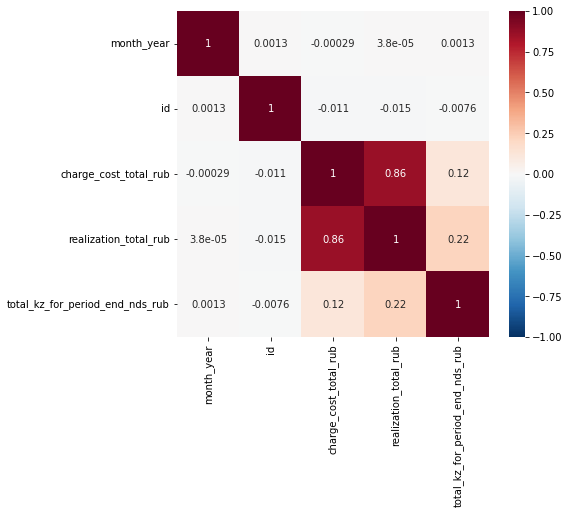

In [ ]:
# Визуализируем таблицу корреляции
plt.figure(figsize=(7,6))
sns.heatmap(corr_2, cmap=sns.color_palette("RdBu_r", 1000), vmin=-1, center=0, annot=True) 
plt.show()

In [ ]:
# Проведем количественный анализ по признаку month_year				
yur_nachisleniya_oplati_dz_kz_2019_2021_df['month_year'].value_counts()

2021.09    161779
2021.08    160501
2021.07    159149
2021.06    157859
2021.05    156400
2021.04    155257
2021.03    153740
2021.02    152276
2021.01    151222
2020.12    150290
2020.11    148947
2020.10    147891
2020.09    146745
2020.08    145814
2020.07    144925
2020.06    144237
2020.05    143733
2020.04    143328
2020.03    142868
2020.02    141926
2020.01    140824
2019.12    139531
2019.11    137201
2019.10    136160
2019.09    135190
Name: month_year, dtype: int64

In [ ]:
# Проведем количественный анализ по признаку id				
yur_nachisleniya_oplati_dz_kz_2019_2021_df['id'].value_counts()

114009039    50
141005112    50
30020931     25
116131686    25
60246030     25
             ..
296806395     1
296787495     1
115481124     1
215691918     1
296798295     1
Name: id, Length: 161812, dtype: int64

In [ ]:
# Проведем количественный анализ по признаку contract_kind					
yur_nachisleniya_oplati_dz_kz_2019_2021_df['contract_kind'].value_counts()

одноставочный      3545712
двуставочный        151998
(не определено)         83
Name: contract_kind, dtype: int64

In [ ]:
# Проведем количественный анализ по признаку contract_type					
yur_nachisleniya_oplati_dz_kz_2019_2021_df['contract_type'].value_counts()

Договор энергоснабжения                                                                         3156092
Договор энергоснабжения с ТГ Население                                                           135828
Договор энергоснабжения с бюджетным учреждением                                                  118633
Государственный контракт                                                                         108306
Муниципальный контракт                                                                            86770
Договор с ИКУ                                                                                     74922
Договор с исполнителем коммунальных услуг и (или) обязанности по содержанию общего имущества       6110
Договор энергоснабжения с ЭСО                                                                      3783
Договор купли-продажи с ЭСО                                                                        3125
Договор энергоснабжения по установленной мощ.                   

In [ ]:
# Проведем количественный анализ по признаку msfo_group_name						
yur_nachisleniya_oplati_dz_kz_2019_2021_df['msfo_group_name'].value_counts()

Прочие потребители                          3055959
Городской/ Местный бюджет                    223610
Управляющие организации, ТСЖ, ЖСК,ЖК         185818
Федеральный бюджет                            74313
Промышленность                                72012
Сельское  хозяйство                           36759
Областной/ Краевой бюджет                     23636
Прочее (котельные, водоканалы и др.)          18824
Энергосбытовые компании (ЭСК, ГП 2, ОПП)       6666
РЖД                                             187
Население (на прямых расчетах)                    7
Код МСФО не определен                             2
Name: msfo_group_name, dtype: int64

In [ ]:
# Проведем количественный анализ по признаку useful_vacation_kVth							
yur_nachisleniya_oplati_dz_kz_2019_2021_df['useful_vacation_kVth'].value_counts()

0          260114
\N          44811
1           13577
100          9323
200          7507
            ...  
810120          1
1160659         1
194991          1
177783          1
1414599         1
Name: useful_vacation_kVth, Length: 226068, dtype: int64

In [ ]:
# Проведем количественный анализ по признаку useful_vacation_total_rub								
yur_nachisleniya_oplati_dz_kz_2019_2021_df['useful_vacation_total_rub'].value_counts()

0            259756
\N            44811
6.88            836
6.92            659
7.37            554
              ...  
77845.85          1
615110.1          1
177796.55         1
2421402.2         1
19781.83          1
Name: useful_vacation_total_rub, Length: 1636693, dtype: int64

In [ ]:
# Проведем количественный анализ по признаку charge_cost_total_rub								
yur_nachisleniya_oplati_dz_kz_2019_2021_df['charge_cost_total_rub'].value_counts()

0.00         1523593
10000.00        1101
5000.00          941
20000.00         811
100000.00        661
              ...   
30391.23           1
143137.11          1
14306.62           1
70066.41           1
155919.77          1
Name: charge_cost_total_rub, Length: 1598280, dtype: int64

In [ ]:
# Проведем количественный анализ по признаку realization_total_rub								
yur_nachisleniya_oplati_dz_kz_2019_2021_df['realization_total_rub'].value_counts()

0.00          400898
10000.00        5322
5000.00         5274
3000.00         3731
20000.00        3611
               ...  
4196.68            1
4495638.00         1
45245.33           1
178055.22          1
11411.44           1
Name: realization_total_rub, Length: 2189887, dtype: int64

In [ ]:
# Проведем количественный анализ по признаку dz_for_period_end_with_nds_rub								
yur_nachisleniya_oplati_dz_kz_2019_2021_df['dz_for_period_end_with_nds_rub'].value_counts()

0            1313342
\N            447094
0.01             195
1146              82
6.4               79
              ...   
15764.35           1
449993.38          1
448392.5           1
1867.93            1
171112.94          1
Name: dz_for_period_end_with_nds_rub, Length: 1465917, dtype: int64

In [ ]:
# Проведем количественный анализ по признаку kz_for_period_end_with_nds_rub								
yur_nachisleniya_oplati_dz_kz_2019_2021_df['kz_for_period_end_with_nds_rub'].value_counts()

\N           1257619
0             902614
10000            473
5000             370
1000             321
              ...   
115693.27          1
27915.82           1
12711.24           1
26273.29           1
5236.16            1
Name: kz_for_period_end_with_nds_rub, Length: 1030132, dtype: int64

In [ ]:
yur_nachisleniya_i_oplati_avansov_df = pd.read_csv('/content/drive/MyDrive/DS ninjas/ch.xackaton_fuv2_yur_nachisleniya_i_oplati_avansov.csv') # Создадим df из таблицы №9

In [ ]:
yur_nachisleniya_i_oplati_avansov_df.head()

,month_year,id,prepayment_percent,prepayments_charged_with_nds_rub,prepayments_paid_with_nds_rub,charge_type_prom
0,2021.03,30000375,30%,86173.07,86173.07,дополнительный аванс 1
1,2021.03,30000375,40%,114902.81,114902.81,дополнительный аванс 2
2,2021.03,30000531,30%,5377.86,5377.86,дополнительный аванс 1
3,2021.03,30000531,40%,7166.44,7166.44,дополнительный аванс 2
4,2021.03,30000807,30%,274126.44,274126.44,аванс мощности


In [ ]:
resumetable(yur_nachisleniya_i_oplati_avansov_df)

Dataset Shape: (5326519, 6)


,Name,dtypes,Missing,Uniques,First Value
0,month_year,float64,0,26,2021.03
1,id,int64,0,129231,30000375
2,prepayment_percent,object,0,51,30%
3,prepayments_charged_with_nds_rub,float64,0,1691784,86173.1
4,prepayments_paid_with_nds_rub,float64,0,1682504,86173.1
5,charge_type_prom,object,0,6,дополнительный аванс 1


In [ ]:
# Выведем таблицу корреляции
corr_3 = yur_nachisleniya_i_oplati_avansov_df.corr()
corr_3.head()

,month_year,id,prepayments_charged_with_nds_rub,prepayments_paid_with_nds_rub
month_year,1.000000,0.006954,0.001007,-0.000051
id,0.006954,1.000000,-0.017432,-0.015634
prepayments_charged_with_nds_rub,0.001007,-0.017432,1.000000,0.970864
prepayments_paid_with_nds_rub,-0.000051,-0.015634,0.970864,1.000000


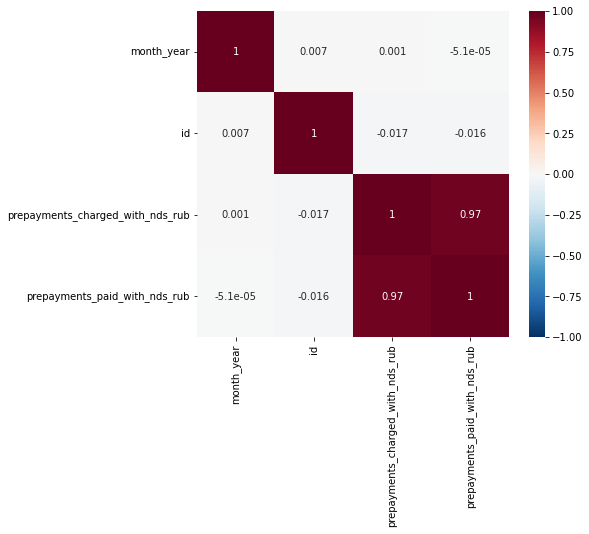

In [ ]:
# Визуализируем таблицу корреляции
plt.figure(figsize=(7,6))
sns.heatmap(corr_3, cmap=sns.color_palette("RdBu_r", 1000), vmin=-1, center=0, annot=True) 
plt.show()

In [ ]:
# Проведем количественный анализ по признаку month_year								
yur_nachisleniya_i_oplati_avansov_df['month_year'].value_counts()

2021.11    230684
2021.04    224797
2021.05    223397
2021.10    218575
2021.03    217764
2021.01    216321
2020.12    214078
2020.11    213489
2020.04    212117
2021.09    212045
2021.06    211888
2019.12    206819
2021.02    206526
2020.03    205457
2021.08    205328
2020.01    205090
2020.10    203672
2019.11    202505
2021.07    200843
2020.02    200667
2020.05    198528
2020.09    198414
2019.10    191428
2020.08    188094
2020.06    161362
2020.07    156631
Name: month_year, dtype: int64

In [ ]:
# Проведем количественный анализ по признаку id								
yur_nachisleniya_i_oplati_avansov_df['id'].value_counts()

181551936    156
246623421    156
247229121    156
45000918     156
246633618    156
            ... 
210245931      1
170728110      1
31020903       1
170882610      1
233120910      1
Name: id, Length: 129231, dtype: int64

In [ ]:
# Проведем количественный анализ по признаку prepayment_percent								
yur_nachisleniya_i_oplati_avansov_df['prepayment_percent'].value_counts()

30%     2823902
40%     2469218
70%       18774
50%        5955
100%       5328
10%        1226
20%         607
15%         290
5%          283
90%         206
3%          143
4%           78
1%           75
2%           63
25%          47
8%           42
6%           36
7%           31
13%          31
60%          24
43%          22
89%          18
53%          16
35%          14
34%           8
9%            7
14%           6
62%           6
56%           6
12%           5
45%           4
68%           4
72%           4
63%           4
4.5%          4
47%           4
37%           4
55%           4
11%           4
36%           3
29%           2
.5%           2
1.5%          1
18%           1
.9%           1
16%           1
22%           1
28%           1
23%           1
27%           1
.3%           1
Name: prepayment_percent, dtype: int64

In [ ]:
# Проведем количественный анализ по признаку prepayments_charged_with_nds_rub								
yur_nachisleniya_i_oplati_avansov_df['prepayments_charged_with_nds_rub'].value_counts()

427.25        314
2153.05       308
1647.76       278
813.12        276
398.76        264
             ... 
1068546.40      1
53730.78        1
1077718.10      1
123067.20       1
243855.83       1
Name: prepayments_charged_with_nds_rub, Length: 1691784, dtype: int64

In [ ]:
# Проведем количественный анализ по признаку prepayments_paid_with_nds_rub								
yur_nachisleniya_i_oplati_avansov_df['prepayments_paid_with_nds_rub'].value_counts()

0.00          674551
0.01             408
1000.00          396
10000.00         387
5000.00          386
               ...  
1725118.40         1
33529.97           1
33025.53           1
11089.90           1
880722.70          1
Name: prepayments_paid_with_nds_rub, Length: 1682504, dtype: int64

In [ ]:
# Проведем количественный анализ по признаку charge_type_prom								
yur_nachisleniya_i_oplati_avansov_df['charge_type_prom'].value_counts()

дополнительный аванс 1    2367926
дополнительный аванс 2    2339588
дополнительный аванс 3     347547
аванс мощности             133620
аванс мощности 2           130894
аванс мощности 3             6944
Name: charge_type_prom, dtype: int64